In [1]:
from candex import candex

cndx = candex()  # initialize candex object
cndx.name_of_case = 'capitals_north_america_merged'
cndx.temporary_candex_folder = '../temporary/'
cndx.name_of_target_shp = '../data/target_shapefiles/Capitals_multipoints.shp'
cndx.name_of_nc_files = '../data/Source_nc_ERA5/ERA5_NA_*.nc'
cndx.name_of_var_name = ['airtemp']
cndx.name_of_var_lon = 'longitude' 
cndx.name_of_var_lat = 'latitude'
cndx.name_of_var_time = 'time'
cndx.name_of_nc_output_folder = '../output/'
cndx.format_list          =  ['f4']
cndx.fill_value_list     = ['-9999.00']

# execute candex
cndx.run_candex()




candex detects that target shapefile is in WGS84 (epsg:4326)
candex detects that no fields are provided for ID, lat, lon and will assign those by itself


/Users/shg096/Desktop/candex_newgen/candex/candex.py:111: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  shp['lat_t'] = shp.centroid.y # centroid lat from target
/Users/shg096/Desktop/candex_newgen/candex/candex.py:112: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  shp['lon_t'] = shp.centroid.x # centroid lon from target


candex detected multipoint as geometry of target shapefile and will considere it as multipolygone
hence candex will provide the average of all the point in each multipoint
if you mistakenly have given poitns as multipoints please correct the target shapefile
candex will save standard shapefile for candex claculation as:
../temporary/capitals_north_america_target_shapefile.shp
candex detects that the varibales from the netCDF files are identicalin dimensions of the varibales and latitude and longitude
candex detects that all the varibales have dimensions of:
['time', 'latitude', 'longitude']
candex detects that the longitude varibales has dimensions of:
['longitude']
candex detects that the latitude varibales has dimensions of:
['latitude']
candex detects case 1 - regular lat/lon
candex is creating the shapefile from the netCDF file and saving it here:
../temporary/capitals_north_america_source_shapefile.shp
candex decides the netCDF file has longtitude values of -180 to 180; creating t

/Users/shg096/Desktop/candex_newgen/candex/candex.py:541: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  shp_1['AS1'] = shp_1.area
/Users/shg096/Desktop/candex_newgen/candex/candex.py:545: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  shp_2['AS2'] = shp_2.area
/Users/shg096/Desktop/candex_newgen/candex/candex.py:640: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  pairs = gpd.GeoDataFrame(nei, columns=['idx1','idx2'], crs=df1.crs)
/Users/shg096/Desktop/candex_newgen/candex/candex.py:644: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  pairs = gpd.Ge

Remapping ../data/Source_nc_ERA5/ERA5_NA_19790101.nc to ../output/capitals_north_america_remapped_1979-01-01-00-00-00.nc
Started at date and time 2021-01-23 19:40:11.804038
Ended   at date and time 2021-01-23 19:40:11.913129
Remapping ../data/Source_nc_ERA5/ERA5_NA_19790102.nc to ../output/capitals_north_america_remapped_1979-01-02-00-00-00.nc
Started at date and time 2021-01-23 19:40:11.917882
Ended   at date and time 2021-01-23 19:40:12.015868
Remapping ../data/Source_nc_ERA5/ERA5_NA_19790103.nc to ../output/capitals_north_america_remapped_1979-01-03-00-00-00.nc
Started at date and time 2021-01-23 19:40:12.020307
Ended   at date and time 2021-01-23 19:40:12.122027


    S_1_name  ID_t      lat_t      lon_t           AS1  IDS1      ID_s  lat_s  \
0   Capitals     1  18.001843  21.454163  4.040000e-08     1  116833.0  14.00   
1   Capitals     1  18.001843  21.454163  4.040000e-08     1  126339.0   9.00   
2   Capitals     1  18.001843  21.454163  4.040000e-08     1  124405.0  10.00   
3   Capitals     1  18.001843  21.454163  4.040000e-08     1  123515.0  10.50   
4   Capitals     1  18.001843  21.454163  4.040000e-08     1  120085.0  12.25   
5   Capitals     1  18.001843  21.454163  4.040000e-08     1  115757.0  14.50   
6   Capitals     1  18.001843  21.454163  4.040000e-08     1  116728.0  14.00   
7   Capitals     1  18.001843  21.454163  4.040000e-08     1  117199.0  13.75   
8   Capitals     1  18.001843  21.454163  4.040000e-08     1  110599.0  17.25   
9   Capitals     1  18.001843  21.454163  4.040000e-08     1  110495.0  17.25   
10  Capitals     1  18.001843  21.454163  4.040000e-08     1  108175.0  18.50   
11  Capitals     1  18.00184

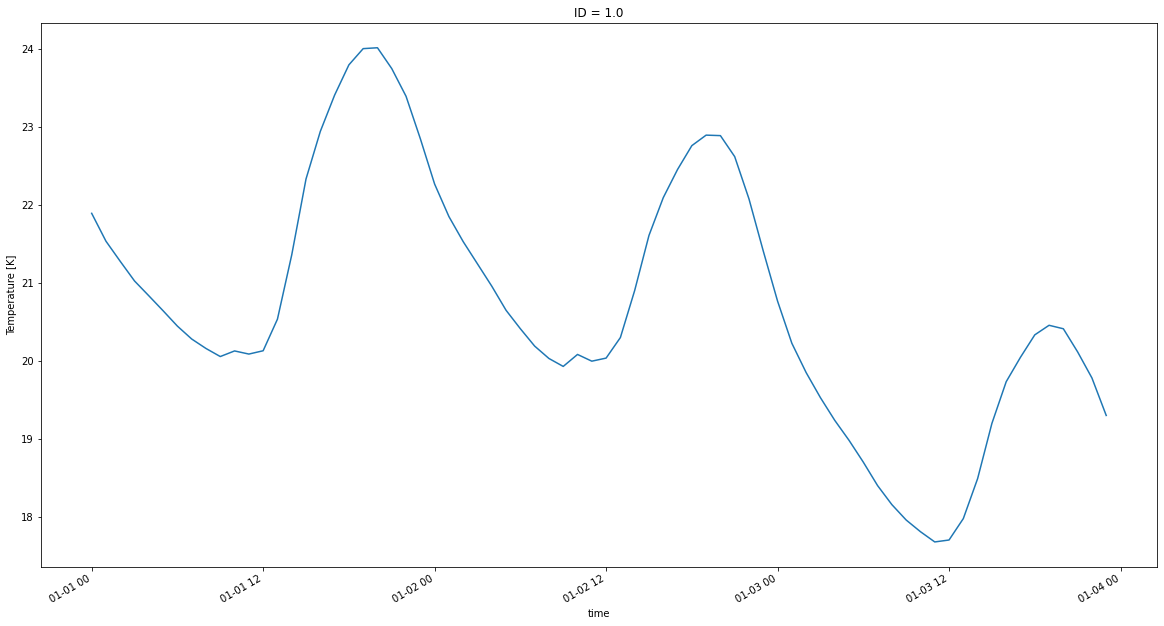

In [4]:
# visualize the result
import geopandas as gpd
import xarray as xr
import glob
shp = gpd.read_file('../temporary/capitals_north_america_intersected_shapefile.shp')
print(shp)

#ds = xr.open_dataset('../output/1979-01-01-00-00-00.nc')

ds = xr.merge([xr.open_dataset(f) for f in sorted(glob.glob('../output/capitals_north_america_*_1979-01-*.nc'))])


print(ds)
print(ds.ID)
ds.airtemp [:,:] = ds.airtemp[:,:] - 273;
ds.airtemp.plot(figsize=(20,10))
